# PCA
PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. 

In scikit-learn, PCA is implemented as a transformer object that learns n components in its fit method, and can be used on new data to project it on these components.

... there are also other options, e.g. "RandomizedPCA".

### n_components: 
Number of components to keep. if n_components is not set all components are kept: n_components == min(n_samples, n_features).
If n_components == ‘mle’, Minka’s MLE is used to guess the dimension if 0 < n_components < 1, select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components

### copy:
If False, data passed to fit are overwritten

### whiten:
When True (False by default) the components_ vectors are divided by n_samples times singular values to ensure uncorrelated outputs with unit component-wise variances.

Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making there data respect some hard-wired assumptions.

https://sebastianraschka.com/Articles/2014_pca_step_by_step.html#principal-component-analysis-pca-vs-multiple-discriminant-analysis-mda

https://sebastianraschka.com/Articles/2014_kernel_pca.html


### LDA
Variance between classes. I want to do this too http://sebastianraschka.com/Articles/2014_python_lda.html

In [37]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Data generation

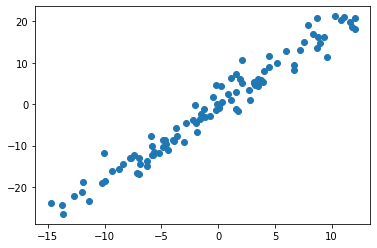

In [62]:
t = np.arange(0,10,0.01)

x1 = 2*np.random.normal(0,3,size=100)
x2 = np.random.normal(0,3,size=100) + x1
#x1 = np.sin(np.pi*t)
#x2 = 0.1*t

plt.scatter(x2,x2+x1)
#plt.axes().set_aspect('equal')

### PCA fitting

[[-0.65721725 -0.75370119]
 [ 0.75370119 -0.65721725]]


[0.95643034 0.04356966]


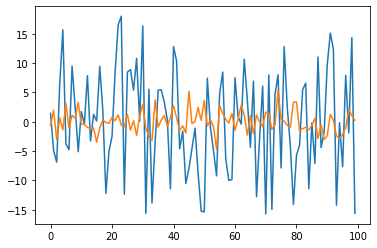

In [80]:
X = np.c_[x1, x2]
pca = PCA(copy=True, n_components=None, whiten=False)
#pca.fit(X) # X.shape = (samples, features)

X_reduced = pca.fit_transform(X) #scores
print( pca.components_ )         # loadings / eigen vectors.T

P = pca.components_
#print("First component ", P.T[:,0])
T = X.dot(P.T)

#plt.plot(T)
plt.plot(X_reduced)
# square prediction error using 1 component
#Xhat = np.dot(T[:,0].reshape(-1,1),P[0,:].reshape(-1,1).T)
#mse = (np.square(Xstd - Xhat)).sum(axis=1)

X_new = pca.inverse_transform(X_reduced)

print('\n')
print( pca.explained_variance_ratio_ )

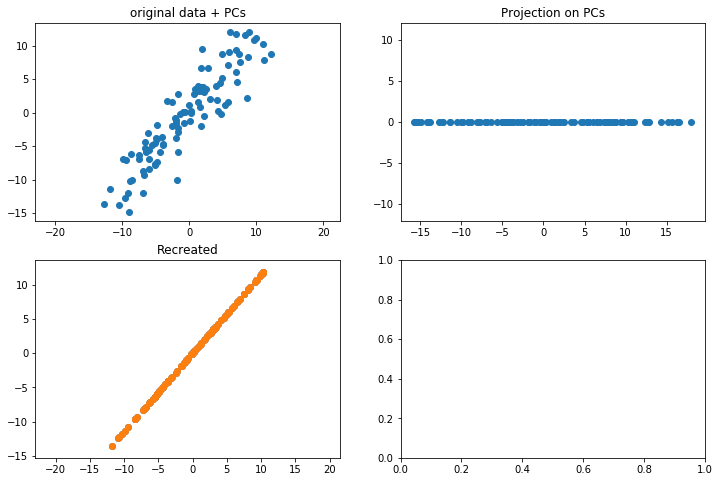

In [77]:
fig = plt.figure(figsize=(12, 8))  # Create figure and determine size
ax1 = plt.subplot(2, 2, 1)    # Create an elongated subplot using two grid indicies
ax2 = plt.subplot(2, 2, 2)         
ax3 = plt.subplot(2, 2, 3) 
ax4 = plt.subplot(2, 2, 4)

loads = pca.components_
sc1 = np.average(X_reduced[:,0])
sc2 = np.average(X_reduced[:,1])

ax1.scatter(x1, x2)
ax1.plot([0, sc1*loads[0,0]], [0, sc1*loads[0,1]], 'r')
ax1.plot([0, sc2*loads[0,1]], [0, sc2*loads[1,1]], 'r')
ax1.set_aspect('equal', adjustable="datalim")
ax1.set_title('original data + PCs')

ax2.set_title('Projection on PCs')
ax2.scatter(X_reduced[:,0], X_reduced[:,1])
ax2.set_aspect('equal', adjustable="datalim")

newx = X_reduced @ (pca.components_) # this is scores * loadings!
X_reduced[:,1] = 0
filtx = X_reduced @ (pca.components_) # this is scores * loadings!

ax3.set_title('Recreated')
ax3.scatter(newx[:,0], newx[:,1])

ax3.scatter(filtx[:,0], filtx[:,1])
ax3.set_aspect('equal', adjustable="datalim")


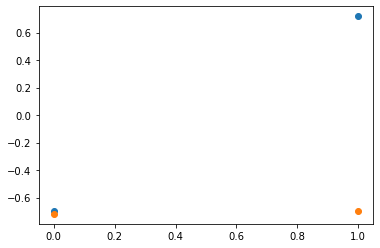

In [44]:
comps = pca.components_
plt.plot(comps, 'o')

    pca = PCA(copy=True, n_components=None, whiten=False)'
#### Fit the model with X:
    pca.fit(X)
#### Apply the dimensionality reduction on X.
    pca.transform(X) 
alternatively pca.fit_transform(X)

#### Transform data back to its original space (NB: whitening)
    inverse_transform(X)

#### get/set:
    get_params([deep])	
    set_params(**params)

#### Attributes:
    pca.explained_variance_ratio_
    pca.components_
